In [ ]:
!pip install --upgrade scikit-image #upgrade to v0.17.x
!git clone https://github.com/zamriibr/cvs_example #clone samples

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.7/dist-packages (0.18.1)
fatal: destination path 'cvs_example' already exists and is not an empty directory.


In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Color and exposure

Images are just numpy arrays. The numbers in those arrays correspond to the intensity of each pixel (or, in the case of a color image, the intensity of a specific color). To manipulate these, `scikit-image` provides the `color` and `exposure` modules.

## Basic image manipulation

Recall that color images are arrays with pixel rows and columns as the first two dimensions (just like a gray-scale image), plus a 3rd dimension that describes the RGB color channels.

(300, 451, 3)


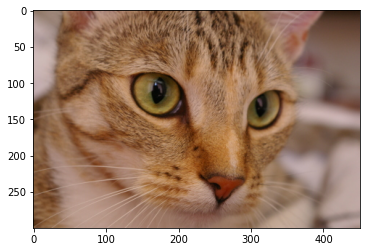

In [ ]:
from skimage import data

color_image = data.chelsea()

print(color_image.shape)
plt.imshow(color_image);

## Slicing and indexing

Since images are just arrays, we can manipulate them as we would any other array.

Let's say we want to plot just the red channel of the color image above. We know that the red channel is the first channel of the 3rd image-dimension. Since Python is zero-indexed, we can write the following:

In [ ]:
red_channel = color_image[:, :, 0]  # or color_image[..., 0]

But when we plot the red channel...

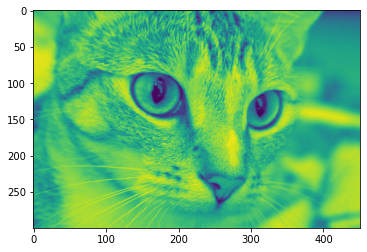

In [ ]:
plt.imshow(red_channel);

Obviously that's not red at all. The reason is that there's nothing to tell us that this array is supposed to be red: It's just a 2D array with a height, width, and intensity value---and no color information.

The green channel is usually closest to the grey-scale version of the image.  Note that converting to grayscale cannot simply be done by taking the mean of the three channels, since the eye is more sensitive to green than to red than to blue.  For that purpose, use ``skimage.color.rgb2gray``, which weighs each channel appropriately.

---

## Question 1: for student 3 (please answer on google form)

Use your own picture. Split your image up into its three components, red, green, blue and grayscale, and display each separately - use subplot. 

Upload the result to google form.

In [ ]:
from skimage import io, color
color_image = io.imread('/lab3.jpg')

Text(0.5, 1.0, 'Grayscale')

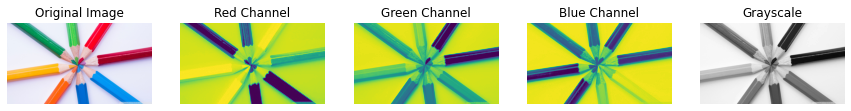

In [ ]:
# This code is to get you started.

# split into 3 channels
# your code here

# convert to grayscale 
#your code here

# display using subplot (1row x 4 col, r-g-b-grayscale)
#your code here
red_channel = color_image[:, :, 0]
green_channel = color_image[:, :, 1]
blue_channel = color_image[:, :, 2]
gray = color.rgb2gray(color_image)

f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(15, 10))
for aa in ((ax0, ax1, ax2, ax3, ax4)):
    aa.set_axis_off()
ax0.imshow(color_image);
ax0.set_title('Original Image')

ax1.imshow(red_channel);
ax1.set_title('Red Channel')

ax2.imshow(green_channel);
ax2.set_title('Green Channel')

ax3.imshow(blue_channel);
ax3.set_title('Blue Channel')

ax4.imshow(gray, cmap='gray');
ax4.set_title('Grayscale')

---

## Color spaces

While RGB is fairly easy to understand, using it to detect a specific color (other than red, green, or blue) can be a pain. Other color spaces often devote a single component to the image intensity (a.k.a. luminance, lightness, or value) and two components to represent the color (e.g. hue and saturation in [HSL and HSV](http://en.wikipedia.org/wiki/HSL_and_HSV)).

You can easily convert to a different color representation, or "color space", using functions in the `color` module.

This example illustrates how RGB to HSV (Hue, Saturation, Value) conversion 1 can be used to facilitate segmentation processes.

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.

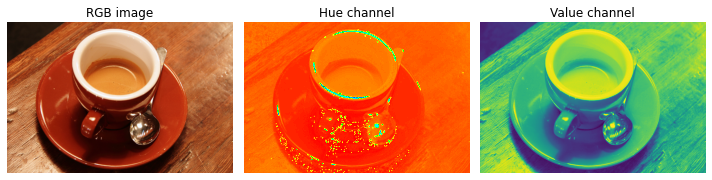

In [ ]:
import matplotlib.pyplot as plt

from skimage import data, io
from skimage.color import rgb2hsv, hsv2rgb

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 10))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()


We then set a threshold on the Hue channel to separate the cup from the background:

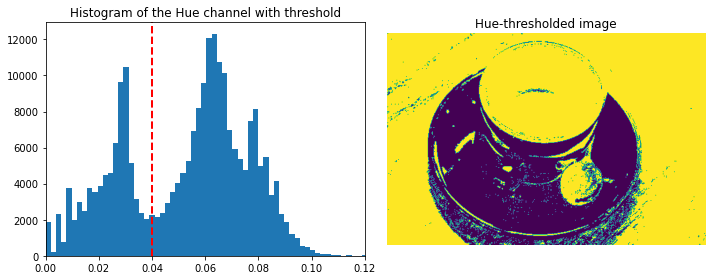

In [ ]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

We finally perform an additional thresholding on the Value channel to partly remove the shadow of the cup:

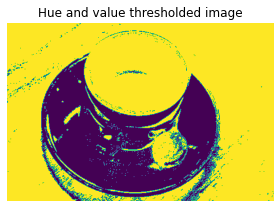

In [ ]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

---

# Histogram matching

This example demonstrates the feature of histogram matching. It manipulates the pixels of an input image so that its histogram matches the histogram of the reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.

Histogram matching can be used as a lightweight normalisation for image processing, such as feature matching, especially in circumstances where the images have been taken from different sources or in different conditions (i.e. lighting).

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
reference1 = data.colorwheel()
image = io.imread('/content/WhatsApp Image 2021-03-30 at 20.40.30.jpeg')

matched = match_histograms(image, reference, multichannel=True)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10),
                                    sharex=True, sharey=True)

plt.axis('off')

axes[0,0].imshow(image)
axes[0,0].set_title('Source')

axes[0,1].imshow(reference)
axes[0,1].set_title('Reference 1')

axes[0,2].imshow(matched)
axes[0,2].set_title('Matched')

axes[1,0].imshow(image)
axes[1,0].set_title('Source')

axes[1,1].imshow(reference1)
axes[1,1].set_title('Reference 2')

axes[1,2].imshow(matched)
axes[1,2].set_title('Matched')

plt.tight_layout()
plt.show()

FileNotFoundError: ignored

## Question 2: for student 2 (please answer on google form)

1. Use your own picture to replace above source image 'Chelsea'.
2. Use two different reference image other than 'coffee'

What did you observed ? What is the advantage using this color enhancement technique ?

Upload the result to google form. (Image subplot 2row x 3col)

---

# Segmentation

### Segmentation contains two major sub-fields

* **Supervised** segmentation: Some prior knowledge, possibly from human input, is used to guide the algorithm.  Supervised algorithms currently included in scikit-image include
  *  Thresholding algorithms which require user input (`skimage.filters.threshold_*`) **covered here**
  * `skimage.segmentation.random_walker`
  * `skimage.segmentation.active_contour`
  * `skimage.segmentation.watershed`
* **Unsupervised** segmentation: No prior knowledge.  These algorithms attempt to subdivide into meaningful regions automatically.  The user may be able to tweak settings like number of regions.
  *  Thresholding algorithms which require no user input.
  *  `skimage.segmentation.slic`
  * `skimage.segmentation.chan_vese`
  * `skimage.segmentation.felzenszwalb`
  * `skimage.segmentation.quickshift`

## Thresholding

In some images, global or local contrast may be sufficient to separate regions of interest.  Simply choosing all pixels above or below a certain *threshold* may be sufficient to segment such an image.

Let's try this on an image of a textbook.

(191, 384)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


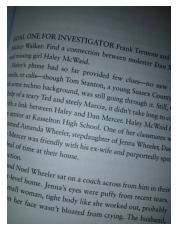

In [ ]:
import cv2
from skimage.color import rgb2gray
text = data.page()
test = cv2.imread('/content/try.jpeg')
print(text.shape)
gray = rgb2gray(text)
plt.axis('off')
plt.imshow(test, cmap='gray');

### Histograms

A histogram simply plots the frequency (number of times) values within a certain range appear against the data values themselves.  It is a powerful tool to get to know your data - or decide where you would like to threshold.

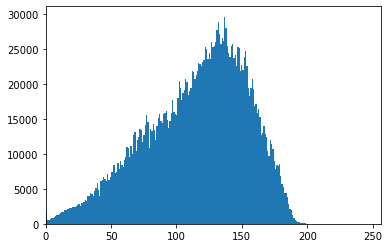

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(test.ravel(), bins=256, range=[0, 255])
ax.set_xlim(0, 256);

### Experimentation: supervised thresholding

Try simple NumPy methods and a few different thresholds on this image.  Because *we* are setting the threshold, this is *supervised* segmentation.

In [ ]:
text_threshold = 200 #pls test different value
text_segmented = test < text_threshold

plt.axis('off')
plt.imshow(text_segmented, cmap='gray');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f927e5bac20> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

Not ideal results! The shadow on the left creates problems; no single global value really fits.

What if we don't want to set the threshold every time? There are several published methods which look at the histogram and choose what should be an optimal threshold without user input. These are unsupervised.

### Experimentation: unsupervised thresholding

Here we will experiment with a number of automatic thresholding methods available in scikit-image.  Because these require no input beyond the image itself, this is *unsupervised* segmentation.

These functions generally return the threshold value(s), rather than applying it to the image directly.

Try `otsu` then take a look at `sauvola`.

Text(0.5, 1.0, 'SAUVOLA')

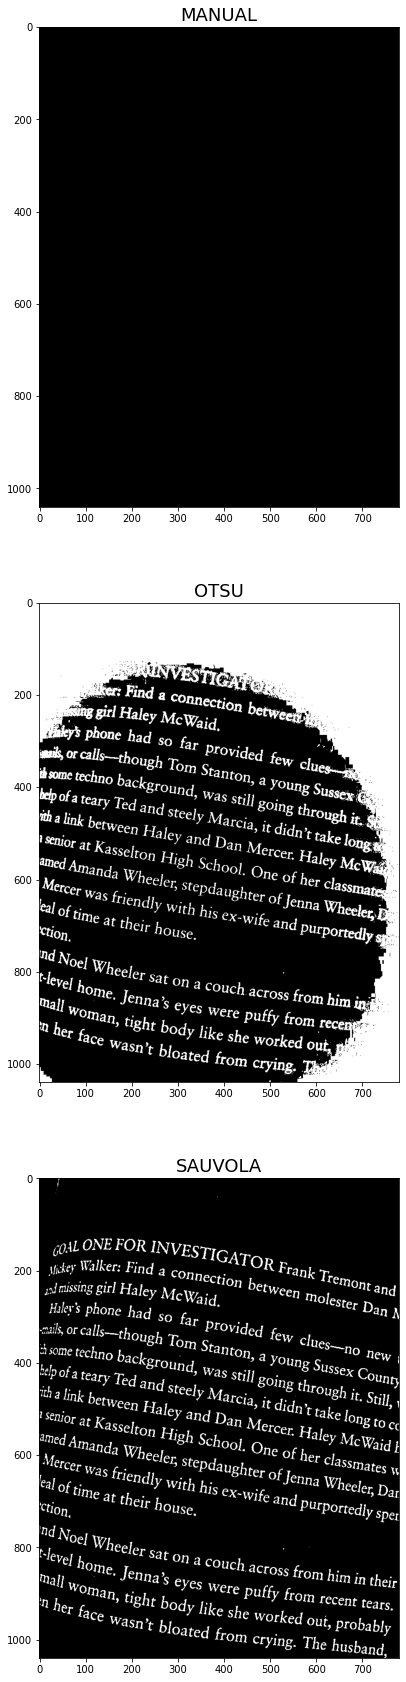

In [ ]:
from skimage import img_as_float
import cv2
from skimage import filters
from skimage.color import rgb2gray
text = img_as_float(io.imread('/content/try.jpeg'))

gray = color.rgb2gray(text)
my_gray = text @ [0.2126, 0.7152, 0.0722]
my_gray2 = text[:,:,0] * 0.2126 + text[:,:,1] * 0.7152 + text[:,:,2] * 0.0722


text_threshold0 = 200000
text_threshold1 = filters.threshold_otsu(my_gray2)
text_threshold2 = filters.threshold_sauvola(my_gray2)

f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30, 30))

try1 = my_gray2 < text_threshold0
try2 = my_gray2 < text_threshold1
try3 = my_gray2 < text_threshold2

ax0.imshow(try1, cmap='gray')
ax0.set_title('MANUAL', fontsize=18)

ax1.imshow(try2, cmap='gray')
ax1.set_title('OTSU', fontsize=18)

ax2.imshow(try3, cmap='gray')
ax2.set_title('SAUVOLA', fontsize=18)

## Question 3: for student 1 (please answer on google form)

1. Capture 'text image' from any textbook using your phone.
2. Plot the images using
   - row1: supervised threshold (manual)
   - row2: unsupervised threshold (otsu)
   - row3: unsupervised threshold (sauvola)

What did you observed ? What is the advantage using unsupervised threshold technique ?

Upload the result to google form. (Image subplot 3row x 1col)